## 경사하강법(gradient descent)

Machine Learning, 데이터 분석에는 특정 상황에 가장 적합한 모델을 찾아야 할 때가 많다.
가장 적합한(best)이라는 건 모델의 오류를 최소화하는, likelihood(우도, 공산 - probability와는 다르다)를 최대화(이를 측정한 최대 가능도 추정량은 Maximum likelihood estimator라고 한다.)하는 것을 의미한다. 
실수 벡터를 입력하면 실수 하나를 출력해 주는 함수 f가 있다고 하자.

In [15]:
import random, math

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

def sum_of_squares(v):
    return sum(v_i ** 2 for v_i in v)

이런 함수를 최대화(최소화)할 수 있어야 한다. 즉, f를 최대화하는 v를 찾아야 한다.  
경사(gradient)는 함수가 가장 빠르게 증가할 수 있는 방향을 나타낸다.  
함수의 최댓값을 구하는 방법 중 하나는 임의의 시작점을 잡은 후 gradient를 계산하고 gradient의 방향으로 조금씩 이동하는 과정을 여러 번 반복하는 것이다. 마찬가지로 함수의 최솟값은 반대 방향으로 이동해 구할 수 있다.

In [16]:
def difference_quotient(f,x,h):
    return (f(x+h) - f(x)) / h

In [17]:
# 도함수를 구해보자
def square(x):
    return x * x

def derivative(x) :
    return 2 * x

derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)
derivative_estimate(5)

10.000009999444615

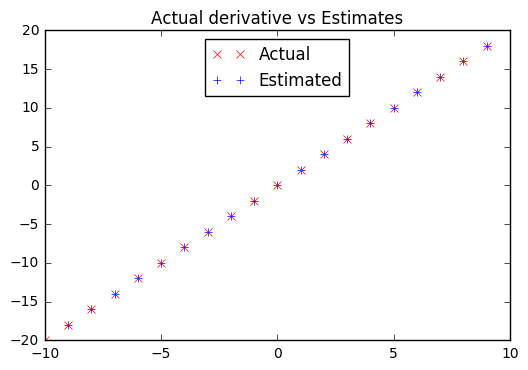

In [4]:
import matplotlib.pyplot as plt
x = range(-10, 10)

plt.title("Actual derivative vs Estimates")
plt.plot(x, [derivative(x_i) for x_i in x], 'rx', label='Actual')  # red x
plt.plot(x, [derivative_estimate(x_i) for x_i in x], 'b+', label='Estimated')  # blue +
plt.legend(loc=9)
plt.show()

f가 다변수를 갖는 함수일 때 여러 개의 변수 중 하나에 작은 변화가 있을 때 f(x)의 변화량을 알려주는 편도함수도 여러 개 존재한다.
i번째 편도함수는 i번 변수를 제외한 모든 변수를 고정시켜 계산할 수 있다.

In [5]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

## Gradient 적용하기

sum_of_square의 최솟값을 경사 하강법을 이용해서 구해보자. 임의의 시작점을 두고 gradient가 아주 작아질 때까지 경사의 반대 방향으로 조금씩 이동하면 된다.

In [82]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v,direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

#임의의 시작점과 허용치
v = [random.randint(-10, 10) for i in range(3)]
tolerance = 0.0001


while True:
    gradient = sum_of_squares_gradient(v) # sum_of_squares의 도함수는 2배수이므로.
    next_v = step(v, gradient, -0.01) #v만큼 
    if distance(next_v, v) < tolerance: #vector substract의 표준편차로 distance를 잰다.
        break
    v = next_v

경사를 따라 이동한다는 논리는 명백하지만 이동 거리(step size)즉 얼마나 이동해야 하는가를 정하기는 쉽지 않다. 실제 이동 거리를 정하는 것은 과학보단 기술(art)에 가깝다. 일반적인 옵션은 다음과 같다.

- 이동 거리 고정
- 시간에 따라 이동 거리를 줄여감
- 이동할 때마다 목적 함수를 최소화하는 이동 거리로 설정

세 번째는 계산 비용이 굉장히 크다. 몇몇 정해진 거리를 시도해보고 그 중 적절한 값을 고르는 방법이 있다.

In [14]:
step_sizes = [100,10,1,0.1,0.01,0.001,0.0001,0.0001]
def safe(f):
    """f와 똑같은 함수를 반환하지만 f에 오류가 발생하면 무한대를 반환환다."""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

대부분의 경우 최소화하려는 함수(target_fn)와 그에 대한 경사함수(gradient_fn)가 존재한다.
target_fn이 특정 모델의 파라미터에 대한 오류값 함수라면, 경사 하강법을 이용해 오류값을 최소화하는 파라미터를 찾을 수 있다.
파라미터의 시작점 theta_0을 구했다고 쳤을 때, 경사 하강법을 다음과 같이 구현할 수 있다.

In [21]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """목적 함수를 최소화하는 theta를 경사 하강법을 통해 찾아준다."""
    step_sizes = [100,10,1,0.1,0.01,0.001,0.0001,0.00001]
    
    # Initialize
    theta = theta_0              # theta를 시작점으로
    target_fn = safe(target_fn)  # 대상 함수 검사
    value = target_fn(theta)     # 최소화 하려는 값
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
        
        #함수를 최소화하는 theta 선택
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        #tolerance에 수렴하면 멈춤.
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

위의 경사 하강법은 반복문을 돌 때마다 데이터셋 전체를 살펴본다. - target_fn이 데이터셋 전체에 대한 에러를 반환한다. - 반대로 한 번에 하나의 데이터 값을 보는 방법을 시도해보자.  
함수를 최대화해야 할 경우 target_fn의 음수값을 최소화하면 된다.

In [23]:
def negate(f):
    """x 입력 시 -f(x)반환"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """f가 여러 수를 반환할 때 모든 숫자를 음수로"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)
                          

### Stochastic Gradient Descent (SGD)

모델의 오류를 최소화하기 위해 경사 하강법을 자주 이용하게 되는데, minimize_batch를 이용할 경우 데이터 셋 전체를 돌며 gradient값을 계산해야 하므로 비용이 많이 든다.  
그런데 대부분의 오류 함수들에게는 더할 수 있는(additive)특성이 있기 때문에, 데이터 전체에 대한 오류값은 각각의 데이터 포인트의 오류값의 합과 같다. 이 때 하나의 반복문에서 데이터 포인트 하나에 대한 gradient를 계산하는 SGD를 사용할 수 있다.

In [1]:
# 한 번 반복문을 돌 때마다 무작위 데이터 포인트를 사용한다.
# stochastic - 추계학적인 확률적인

def in_random_order(data):
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x, y)
    theta = theta_0                              # 시작점
    alpha = alpha_0                              # step_size, 기본 이동 거리
    min_theta, min_value = None, float("inf")    # 시작 시 최솟값
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement > 100:
        value = sum(target_fn(x_i, y_i, theta)for x_i, y_i in data)
        
        if value < min_value:
            # 새로운 최솟값을 찾았다면 이 값을 저장하고 기본 이동 거리로 다시 돌아감
            min_theta, min_value = theta, value
            iterations_with_no_improvements = 0 
            alpha = alpha_0
        else:
            # 최솟값이 줄어들지 않으면 이동 거리 축소
            iterations_with_no_improvement += 1
            alpha *= 0.9
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_substract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

# maximize_stochastic

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

$$f(\alpha, \beta |x_i,y_i,\sigma)= \frac{1}{sqrt{2 \pi \sigma} exp(-(y_i-\alpha - )) $$

$$f(\alpha, \beta |x_i,y_i,\sigma)= \frac{1}{\sqrt{2\pi} \sigma} exp(-(y_i-\alpha - \beta x_i)^2/2\sigma^2)$$